In [119]:
import pandas as pd
from fuzzywuzzy import fuzz

pd.set_option('display.max_rows', 550)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', 200)

In [120]:
tweets = pd.read_csv('output_got_orig.csv')

In [121]:
#remove unnecessary columns
tweets = tweets.drop(columns = ['to', 'geo', 'mentions'])

In [122]:
tweets.head()

,date,username,retweets,favorites,text,hashtags,id,permalink
0,2017-01-01 23:59:59,DarknetResearch,1,1,Did anyone notice Bitcoin hit $1000 a few hours ago?,NaN,815709184171724800,https://twitter.com/DarknetResearch/status/815709184171724800
1,2017-01-01 23:59:31,yabtcl,0,0,1933Lvm4S...Ez3bgFVe1 just won 0.0000018 BTC in our Free #lottery . Looking for free BTC? https:// yabtcl.com/freeLottery.as px … #YABTCL #Bitcoin,#lottery #YABTCL #Bitcoin,815709067670786048,https://twitter.com/yabtcl/status/815709067670786048
2,2017-01-01 23:59:19,BlackBullTradn,0,0,coindesk: The latest Bitcoin Price Index is 997.75 USD http://www. coindesk.com/price/ pic.twitter.com/Lq9Kiiy8v8,NaN,815709017779662848,https://twitter.com/BlackBullTradn/status/815709017779662848
3,2017-01-01 23:59:17,exploretravel1,0,0,Join ExploreTraveler in the BitCoin Revolution http:// lnkplg.co/A0DBE pic.twitter.com/cgYBALtrZ9,NaN,815709009437216769,https://twitter.com/exploretravel1/status/815709009437216769
4,2017-01-01 23:59:08,wee_insanecoin,0,0,Re: Insane Bitcoin Garden Retweet Bonanza | 6 INSANE for each retweet | Every Day! http:// dlvr.it/N197fl pic.twitter.com/TyIu3LgMWk,NaN,815708971222724609,https://twitter.com/wee_insanecoin/status/815708971222724609


In [123]:
#Create document df
corpus = tweets['text']
corpus = pd.DataFrame(corpus)
#add column for comment length
corpus['comment_length'] = tweets['text'].str.len()

In [124]:
#get rid of tweets with links
corpus['text'] = corpus[~corpus['text'].str.contains("http://")]
corpus = corpus.dropna()
corpus['text'] = corpus[~corpus['text'].str.contains("https://")]
corpus = corpus.dropna()
#remove stops
#remove hashtags
#remove non-english
#make lowercase: clean_text_2 = clean_text_1.lower()
#other cleaning/refining

#add TFIDF

In [125]:
corpus.head(100)

,text,comment_length
0,Did anyone notice Bitcoin hit $1000 a few hours ago?,52
13,BFG testnet: first blocks mined! our testnet is now operational :-) 2017 and Bitcoin is off to a good start!,108
23,Bitcoin has made me so overwhelmingly happy these past few weeks. Literal gift from God,87
24,I suppose what we may see more than anything is younger *would be* gold stackers holding Bitcoin instead.,105
26,Bitcoin price difference over the last hour: -$4.99.,52
29,"Bitcoin Price $996.53 / € 946.56 / USD/VEF 3,153,718.40 #bitcoin #btc #news #finance #bitcoinprice #blockchain #Currency",120
40,Now would be a good time @krakenfx #MtGox #bitcoin,50
41,tfw u know bitcoin will succeed but ur still hesitant to invest cause ur an ape,79
43,Le cours du #Bitcoin est de 954.1€ (996.06$) #Blockchain #Cryptocurrency,72
44,"#Anoncoin / #ANC price now: $0.013087, that's -0.42% change in 1hour. ? past day, and 8.75% in the past week! #Bitcoin is $998.28",129


In [126]:
corpus = corpus.reset_index().drop(columns=["index"])

corpus

,text,comment_length
0,Did anyone notice Bitcoin hit $1000 a few hours ago?,52
1,BFG testnet: first blocks mined! our testnet is now operational :-) 2017 and Bitcoin is off to a good start!,108
2,Bitcoin has made me so overwhelmingly happy these past few weeks. Literal gift from God,87
3,I suppose what we may see more than anything is younger *would be* gold stackers holding Bitcoin instead.,105
4,Bitcoin price difference over the last hour: -$4.99.,52
5,"Bitcoin Price $996.53 / € 946.56 / USD/VEF 3,153,718.40 #bitcoin #btc #news #finance #bitcoinprice #blockchain #Currency",120
6,Now would be a good time @krakenfx #MtGox #bitcoin,50
7,tfw u know bitcoin will succeed but ur still hesitant to invest cause ur an ape,79
8,Le cours du #Bitcoin est de 954.1€ (996.06$) #Blockchain #Cryptocurrency,72
9,"#Anoncoin / #ANC price now: $0.013087, that's -0.42% change in 1hour. ? past day, and 8.75% in the past week! #Bitcoin is $998.28",129


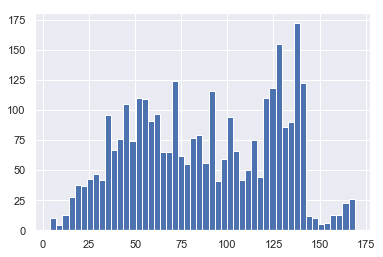

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

# This creates a histogram of all of the review lengths
ax = corpus['comment_length'].hist(bins=50)
ax.set(xlabel='', ylabel='', 
       title='');

In [128]:
#apply sentiment analysis indicators

In [129]:
"""
User features:

First Bitcoin tweet
avg_likes
avg_rt
avg_mlu
avg_word_freq
num_followers

"""

"""
Tweet features:

Sentiment
likes
rt
mlu
word_freq

"""

# What will my clusters look like?

# Veteran users to noob users
# Haters to lovers
# Technologists to Traders to Economists to Regulators

'\nTweet features:\n\nSentiment\nlikes\nrt\nmlu\nword_freq\n\n'

In [130]:
"""
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

corpus = cv.fit_transform(corpus)
# = cv.transform(corpus)

#nb = MultinomialNB()
#nb.fit(X_train, y_train)
#nb.score(X_test, y_test)
"""

'\nfrom sklearn.feature_extraction.text import CountVectorizer\ncv = CountVectorizer()\n\ncorpus = cv.fit_transform(corpus)\n# = cv.transform(corpus)\n\n#nb = MultinomialNB()\n#nb.fit(X_train, y_train)\n#nb.score(X_test, y_test)\n'

In [131]:
"""

To-do:

Finish pre-processing
Get Language filter to work
* Combine months data
Get set of users from multi-month data
Begin user history pull
Port multi-month to AWS
Run first clustering model



"""

'\n\nTo-do:\n\nAdd back in http but cut out string chunk after http\nCreate query which finds all users from tweet list and then collects all tweets from that user\nFuzzywuzzy implementation\nApply basic sentiment analysis algo\n\n'

In [132]:
tweets.head(50)

,date,username,retweets,favorites,text,hashtags,id,permalink
0,2017-01-01 23:59:59,DarknetResearch,1,1,Did anyone notice Bitcoin hit $1000 a few hours ago?,NaN,815709184171724800,https://twitter.com/DarknetResearch/status/815709184171724800
1,2017-01-01 23:59:31,yabtcl,0,0,1933Lvm4S...Ez3bgFVe1 just won 0.0000018 BTC in our Free #lottery . Looking for free BTC? https:// yabtcl.com/freeLottery.as px … #YABTCL #Bitcoin,#lottery #YABTCL #Bitcoin,815709067670786048,https://twitter.com/yabtcl/status/815709067670786048
2,2017-01-01 23:59:19,BlackBullTradn,0,0,coindesk: The latest Bitcoin Price Index is 997.75 USD http://www. coindesk.com/price/ pic.twitter.com/Lq9Kiiy8v8,NaN,815709017779662848,https://twitter.com/BlackBullTradn/status/815709017779662848
3,2017-01-01 23:59:17,exploretravel1,0,0,Join ExploreTraveler in the BitCoin Revolution http:// lnkplg.co/A0DBE pic.twitter.com/cgYBALtrZ9,NaN,815709009437216769,https://twitter.com/exploretravel1/status/815709009437216769
4,2017-01-01 23:59:08,wee_insanecoin,0,0,Re: Insane Bitcoin Garden Retweet Bonanza | 6 INSANE for each retweet | Every Day! http:// dlvr.it/N197fl pic.twitter.com/TyIu3LgMWk,NaN,815708971222724609,https://twitter.com/wee_insanecoin/status/815708971222724609
5,2017-01-01 23:59:07,bitcointonic,0,0,[BUY] Bitcoin mining operation 2099BU http:// dlvr.it/N197f0 pic.twitter.com/30qZWKTaG7,NaN,815708968681021440,https://twitter.com/bitcointonic/status/815708968681021440
6,2017-01-01 23:59:03,bitrific,0,1,"Bitcoin Price Tops $1,000 in First Day of 2017 Trading http:// dlvr.it/N197XW HN",NaN,815708951278821376,https://twitter.com/bitrific/status/815708951278821376
7,2017-01-01 23:59:02,coindesk,52,52,The latest Bitcoin Price Index is 997.75 USD http://www. coindesk.com/price/ pic.twitter.com/HyJIQCyiRS,NaN,815708947831263234,https://twitter.com/coindesk/status/815708947831263234
8,2017-01-01 23:59:02,Gailmike101,0,0,China is behind the latest Bitcoin craze http:// read.bi/2hBVyJx via @themoneygame,NaN,815708944651976704,https://twitter.com/Gailmike101/status/815708944651976704
9,2017-01-01 23:58:56,kenjit0902,0,1,Bitcoinが3年ぶりの1000ドルに向かって上昇中 http:// dlvr.it/N197Th pic.twitter.com/BDqXONShuG,NaN,815708922493317120,https://twitter.com/kenjit0902/status/815708922493317120


In [143]:
#Fuzzywuzzy implementation
username_set = set(tweets['username'])
unique_username_list = list(username_set)
#look at all tweets by user

for user in unique_username_list:
    single_user_df = tweets.loc[tweets['username'] == user]
    #pick two random tweets from a given user, apply fuzzy ratio, iterate 10 times and then average.
    if len(single_user_df) > 10:
        for i in range(6):
            two_tweets = single_user_df.sample(n=2)
            fuzz_ratio += fuzz.ratio(two_tweets['text'].iloc[0], two_tweets['text'].iloc[1])
        fuzz_ratio = fuzz_ratio / 10
        print(fuzz_ratio, user)
#still need to delete tweets of users who are spam. First delete unnaturally high freq tweets, then apply fuzzy.

32.829042803884875 BitcoinFast
36.282904280388486 bizonacci
27.12829042803885 KPesaBit
24.312829042803884 boutthatbitcoin
31.131282904280386 xbtmoney
38.01312829042804 hackernewsnewsm
31.801312829042804 bitcoinaltcoin_
56.38013128290428 bitcoinrate247
40.53801312829042 wee_insanecoin
46.053801312829044 BTCMaster
27.805380131282902 Diener_Gottes
24.88053801312829 MKucala
25.088053801312828 BetFastBTC
60.708805380131274 quantocusta1btc
34.270880538013124 BitcoinNewsCom
17.027088053801315 cryptolargo
40.202708805380134 BitcoinPowerGir
31.62027088053801 btctradep2p
32.1620270880538 BitcoinFeeds
34.01620270880538 cryptofinancing
39.00162027088054 ClasiffLARA
23.800162027088057 michaeltg
32.080016202708805 newsbitcoininfo
33.30800162027088 exploretravel1
36.53080016202709 btc_report
41.15308001620271 spainbitcoin
23.21530800162027 leashless
30.221530800162025 indahpgs
33.622153080016204 YodiHermawan
37.962215308001625 BitcoinForums
42.696221530800166 tumonedavirtual
31.269622153080014 Bitcoi

In [144]:
single_user_df = tweets.loc[tweets['username'] == 'bitcointonic']
single_user_df

,date,username,retweets,favorites,text,hashtags,id,permalink
5,2017-01-01 23:59:07,bitcointonic,0,0,[BUY] Bitcoin mining operation 2099BU http:// dlvr.it/N197f0 pic.twitter.com/30qZWKTaG7,NaN,815708968681021440,https://twitter.com/bitcointonic/status/815708968681021440
90,2017-01-01 23:48:09,bitcointonic,0,0,"On the First Day of Trading in 2017, The Price of #Bitcoin Tops $1,000: The price of bitcoin inched upward over the… http:// dlvr.it/N1922l pic.twitter.com/mf8aLfjClb",#Bitcoin,815706205641265156,https://twitter.com/bitcointonic/status/815706205641265156
337,2017-01-01 23:25:43,bitcointonic,0,0,Make money cloud mining Bitcoin : #Hasheer 2016.: I found another Bitcoin cloud mining site. Let me know if you… http:// dlvr.it/N18qC1 pic.twitter.com/OGMrJM3t4g,#Hasheer,815700559533510656,https://twitter.com/bitcointonic/status/815700559533510656
817,2017-01-01 22:50:10,bitcointonic,0,0,"Understanding #MMM United, Registration and #BitCoin Usage: Register On MMMUnited and Get 100% Growth in a Month…… http:// dlvr.it/N18Scx pic.twitter.com/uD1k4wg3iF",#MMM #BitCoin,815691616744706048,https://twitter.com/bitcointonic/status/815691616744706048
1284,2017-01-01 22:15:10,bitcointonic,1,0,[BUY] Does Ethereum compete against #Bitcoin 2099BU http:// dlvr.it/N186tc pic.twitter.com/udA2gPtS7H,#Bitcoin,815682807049568256,https://twitter.com/bitcointonic/status/815682807049568256
1893,2017-01-01 21:42:12,bitcointonic,0,0,From Nothing to a PC only with #Bitcoin and ETH?? – Part 1 –: My Bitcoin Wallet Adress :… http:// dlvr.it/N17nxJ pic.twitter.com/TUftTJgskX,#Bitcoin,815674512062562304,https://twitter.com/bitcointonic/status/815674512062562304
1934,2017-01-01 21:39:39,bitcointonic,0,0,EU to Identify #Bitcoin Users: The European Parliament and the Council of the European Union have proposed amending… http:// dlvr.it/N17mTL pic.twitter.com/WVJI2q0lgv,#Bitcoin,815673870170484736,https://twitter.com/bitcointonic/status/815673870170484736
1935,2017-01-01 21:39:38,bitcointonic,0,0,"#Bitcoin ’s Top 6 Tech Stories: Unless precautions are taken, data transmitted over the Bitcoin network can be… http:// dlvr.it/N17mT8 pic.twitter.com/wyEgafwRjy",#Bitcoin,815673862717259776,https://twitter.com/bitcointonic/status/815673862717259776
3201,2017-01-01 20:39:07,bitcointonic,0,0,"#Microsoft Adds Large Support for #Bitcoin , reports it as Currency: Microsoft, a technology giant headquartered in… http:// dlvr.it/N176hv pic.twitter.com/bb9ui9KhPU",#Microsoft #Bitcoin,815658634310864896,https://twitter.com/bitcointonic/status/815658634310864896
3373,2017-01-01 20:30:09,bitcointonic,0,0,2016 #Bitcoin thoughts- Thanks to all of my BTC friends and supporters! 2017 will be great!: We end the year around… http:// dlvr.it/N171fV pic.twitter.com/FTmFn8eevA,#Bitcoin,815656378693914624,https://twitter.com/bitcointonic/status/815656378693914624
